# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Clasroom como `seg_train.zip` y `seg_test.zip`. 

Se pide:

1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).

2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.

3. Normaliza

4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada

5. Reserva un 20% de los datos del entrenamiento para validar.

6. Representa el objeto history

7. Evalua el modelo con los datos de test

8. Representa algunos de los paisajes donde el modelo comete errores

9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer con softmax como ultima capa

In [239]:
#import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os 
import cv2 as cv2

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D

from sklearn.metrics import confusion_matrix

In [168]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (32, 32)


In [169]:
#1.- Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).

In [170]:
absolute_path = "C:/Users/pilar/Edition_Jun2020/Repositorios_GitHub/DataSets/landscapes"
relative_path = "../../../../DataSets/landscapes"
train_path = "/seg_train/"
test_path = "/seg_test/"

In [171]:
os.getcwd()

'c:\\Users\\pilar\\Edition_Jun2020\\Repositorios_GitHub\\activity_bootcamp_jun2020\\2_Machine_Learning\\semana_30\\día_2'

In [172]:
train_folders = os.listdir(relative_path+train_path)
train_folders

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [261]:
     img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
     img.shape

(150, 150, 3)

In [173]:
labels = []
images = []

for folder in train_folders:
    #print(folder)
    for file in os.listdir(relative_path+train_path+folder+"/"):
        #print(file,"\n")
        labels.append(folder)
        path = relative_path+train_path+folder+"/"+file
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        img_resize = cv2.resize(img, dsize= IMAGE_SIZE)
        images.append(img_resize)

In [174]:
#2.- Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.

In [175]:
len(images)

14034

In [176]:
len(labels)

14034

In [177]:
len(labels)

14034

In [178]:
set(labels)

{'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'}

Text(0.5, 1.0, 'sea')

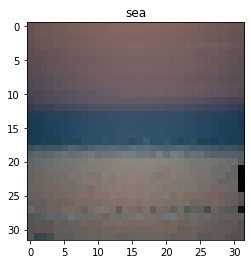

In [179]:
plt.imshow(images[10125])
plt.title(labels[10125])

Text(0.5, 1.0, 'buildings')

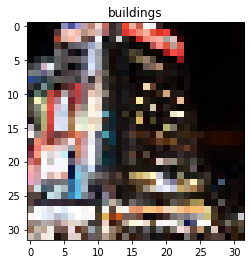

In [180]:
plt.imshow(images[502])
plt.title(labels[502])


Text(0.5, 1.0, 'glacier')

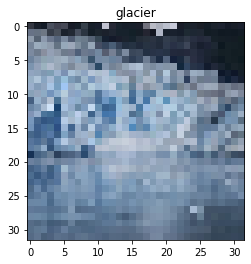

In [181]:
plt.imshow(images[5000])
plt.title(labels[5000])

In [182]:
train_folders

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [183]:
len(labels)

14034

In [184]:
for i, label in enumerate(labels):
    if (label == train_folders[0]):
        labels[i] = 0
    elif (label == train_folders[1]):
        labels[i] = 1
    elif (label == train_folders[2]):
        labels[i] = 2
    elif (label == train_folders[3]):
        labels[i] = 3
    elif (label == train_folders[4]):
        labels[i] = 4
    else:
        labels[i] = 5

In [ ]:
def encoding_labels(labels, train_folders):
    for i, label in enumerate(labels):
        if (label == train_folders[0]):
            labels[i] = 0
        elif (label == train_folders[1]):
            labels[i] = 1
        elif (label == train_folders[2]):
            labels[i] = 2
        elif (label == train_folders[3]):
            labels[i] = 3
        elif (label == train_folders[4]):
            labels[i] = 4
        else:
            labels[i] = 5

    return labels

In [185]:
len(labels)

14034

In [186]:
set(labels)

{0, 1, 2, 3, 4, 5}

In [187]:
df_labels = pd.DataFrame(labels, columns=['category'])
df_labels

,category
0,0
1,0
2,0
3,0
4,0
...,...
14029,5
14030,5
14031,5
14032,5


In [188]:
# Label Encoding 
from keras.utils.np_utils import to_categorical #covert to one-hot-encoding

y = to_categorical(df_labels, num_classes= len(train_folders))

In [189]:
#3.- Normaliza

X = np.array(images)/255
y = np.array(y)

In [190]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [191]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42) #Baraja los registros

In [192]:
y

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

Uniques labels: [0 1 2 3 4 5]
Number of label  [2191 2271 2404 2512 2274 2382]


<AxesSubplot:ylabel='count'>

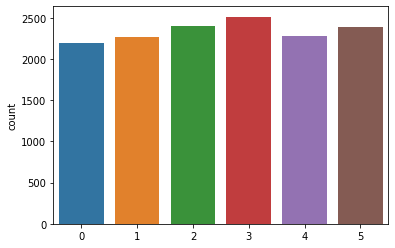

In [193]:
print('Uniques labels:', np.sort(np.unique(labels)))
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print("Number of label ",counts_elements)
sns.countplot(labels)

In [194]:
X.min(), X.max()

(0.0, 1.0)

In [195]:
#4.- Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada

X = X.reshape(-1,32,32,3)

In [196]:
model = Sequential()

model.add(Conv2D(filters= 132,
                              kernel_size= (2,2),
                              activation= 'relu',
                              input_shape= (32,32,3)))
model.add(MaxPool2D(pool_size= (2,2)))


model.add(Conv2D(filters= 64,
                              kernel_size= (3,3),
                              activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Flatten())

model.add(Dense(units= 100,
                             activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(len(train_folders), activation= 'softmax'))

In [197]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

In [198]:
#5.- Reserva un 20% de los datos del entrenamiento para validar.

In [199]:
earlystop = tf.keras.callbacks.EarlyStopping(patience= 4, restore_best_weights= True)

In [200]:
epochs = 10
batch_size = 120


In [201]:
history = model.fit(X, y,
                    epochs=epochs,
                    batch_size= batch_size,
                    validation_split= 0.20)

Epoch 1/10
116/116 [==============================] - 61s 523ms/step - loss: 1.4473 - accuracy: 0.4022 - val_loss: 1.0156 - val_accuracy: 0.5875
Epoch 2/10
116/116 [==============================] - 60s 513ms/step - loss: 0.9770 - accuracy: 0.6348 - val_loss: 0.8192 - val_accuracy: 0.6918
Epoch 3/10
116/116 [==============================] - 58s 497ms/step - loss: 0.8301 - accuracy: 0.6904 - val_loss: 0.7127 - val_accuracy: 0.7346
Epoch 4/10
116/116 [==============================] - 56s 479ms/step - loss: 0.7305 - accuracy: 0.7358 - val_loss: 0.7579 - val_accuracy: 0.7282
Epoch 5/10
116/116 [==============================] - 54s 463ms/step - loss: 0.7178 - accuracy: 0.7402 - val_loss: 0.6489 - val_accuracy: 0.7684
Epoch 6/10
116/116 [==============================] - 53s 457ms/step - loss: 0.6326 - accuracy: 0.7765 - val_loss: 0.6347 - val_accuracy: 0.7830
Epoch 7/10
116/116 [==============================] - 54s 464ms/step - loss: 0.5794 - accuracy: 0.7908 - val_loss: 0.5946 - val_ac

In [202]:
len(history.history['val_accuracy'])

9

In [204]:
history.history['val_accuracy']

[0.587459921836853,
 0.6918418407440186,
 0.734592080116272,
 0.7281795740127563,
 0.768436074256897,
 0.7830423712730408,
 0.791948676109314,
 0.7823299169540405,
 0.7880299091339111]

In [213]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [208]:
np.arange(1,len(history.history['val_accuracy'])+1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [214]:
#6.- Representa el objeto history
df_history = pd.DataFrame({'epochs':np.arange(1,len(history.history['val_accuracy'])+1),
                           'val_accuracy': history.history['val_accuracy']})
df_history['val_loss'] = history.history['val_loss']
df_history

,epochs,val_accuracy,val_loss
0,1,0.587460,1.015602
1,2,0.691842,0.819225
2,3,0.734592,0.712693
3,4,0.728180,0.757934
4,5,0.768436,0.648926
5,6,0.783042,0.634721
6,7,0.791949,0.594609
7,8,0.782330,0.614479
8,9,0.788030,0.599295


Text(0.5, 0, 'epochs')

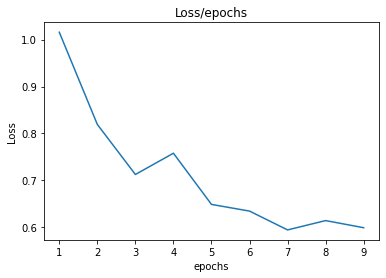

In [215]:
plt.plot(df_history.epochs, df_history.val_loss)
plt.title('Loss/epochs')
plt.ylabel('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

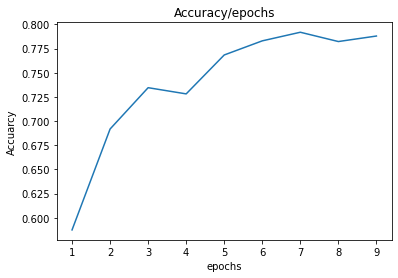

In [216]:
plt.plot(df_history.epochs, df_history.val_accuracy)
plt.title('Accuracy/epochs')
plt.ylabel('Accuarcy')
plt.xlabel('epochs')

In [ ]:
#7.- Evalua el modelo con los datos de test

In [218]:
test_folders = os.listdir(relative_path+test_path)
test_folders

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [219]:
labels_test = []
images_test = []

for folder in test_folders:
    #print(folder)
    for file in os.listdir(relative_path+test_path+folder+"/"):
        #print(file,"\n")
        labels_test.append(folder)
        path = relative_path+test_path+folder+"/"+file
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        img_resize = cv2.resize(img, dsize= IMAGE_SIZE)
        images_test.append(img_resize)

In [220]:
set(labels_test)

{'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'}

In [221]:
for i, label in enumerate(labels_test):
    if (label == test_folders[0]):
        labels_test[i] = 0
    elif (label == test_folders[1]):
        labels_test[i] = 1
    elif (label == test_folders[2]):
        labels_test[i] = 2
    elif (label == test_folders[3]):
        labels_test[i] = 3
    elif (label == test_folders[4]):
        labels_test[i] = 4
    else:
        labels_test[i] = 5

In [222]:
set(labels_test)

{0, 1, 2, 3, 4, 5}

In [224]:
df_labels_test = pd.DataFrame(labels_test, columns=['category'])
df_labels_test


,category
0,0
1,0
2,0
3,0
4,0
...,...
2995,5
2996,5
2997,5
2998,5


In [225]:
y_test = to_categorical(df_labels_test, num_classes= len(test_folders))

In [226]:
y_test

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [227]:
type(y_test)

numpy.ndarray

In [234]:
y_test.shape


(3000, 6)

In [233]:
X_test = (np.array(images_test)/255).reshape(-1,32,32,3)
X_test.shape

(3000, 32, 32, 3)

In [235]:
X_test, y_test = shuffle(X_test, y_test, random_state= 11)

In [237]:
y_test[:10]

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [240]:
predictions_test = model.predict(X_test)

In [242]:
predictions_test.shape

(3000, 6)

In [243]:
predictions_test[:2]

array([[5.3482479e-04, 9.9296278e-01, 6.0761748e-03, 2.1117768e-04,
        5.0120318e-05, 1.6498266e-04],
       [6.3801914e-02, 9.3362617e-01, 9.8932520e-05, 3.5760389e-05,
        1.7101924e-05, 2.4200107e-03]], dtype=float32)

In [249]:
y_test_classes

array([1, 1, 5, ..., 2, 2, 3], dtype=int64)

<AxesSubplot:>

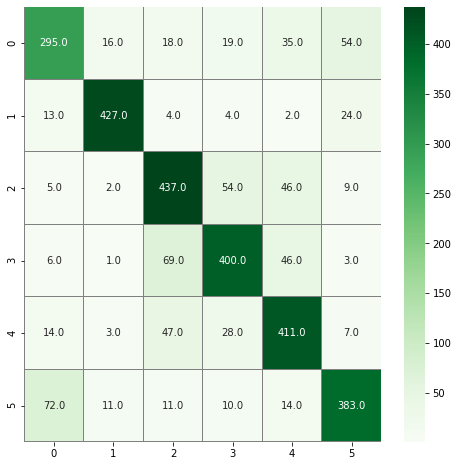

In [248]:
y_test_classes = np.argmax(predictions_test, axis=1) #array de los índices del valor mayor de cada predicción_registro
y_true = np.argmax(y_test, axis=1)  #array de los índices del la categoria_real de cada registro_foto
confusion_mat = confusion_matrix(y_true, y_test_classes) #Matriz de coincidencia de índices_predichos con indices reales
f, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(confusion_mat, annot=True, linewidths = 0.01,
            cmap="Greens", linecolor="gray",
           fmt = '.1f', ax=ax)

In [250]:
#8.- Representa algunos de los paisajes donde el modelo comete errores

df_results = pd.DataFrame({'Category':y_true,
                           'Predictions':y_test_classes})

In [264]:
df_results

,Category,Predictions
0,1,1
1,1,1
2,5,5
3,1,1
4,4,4
...,...,...
2995,3,4
2996,0,0
2997,2,2
2998,2,2


In [266]:
df_results[df_results['Category'] != df_results['Predictions']].index

Int64Index([  10,   17,   18,   21,   27,   28,   33,   44,   53,   54,
            ...
            2948, 2950, 2958, 2970, 2983, 2984, 2988, 2989, 2994, 2995],
           dtype='int64', length=647)

In [268]:
np.random.choice(df_results[df_results['Category'] != df_results['Predictions']].index)

312

In [301]:
indx = np.random.choice(df_results[df_results['Category'] != df_results['Predictions']].index)
print(indx)

266


In [302]:
df_results.loc[indx,'Category']

0

In [310]:
real_cat = test_folders[df_results.loc[indx,'Category']]

In [307]:
df_results.loc[indx,'Predictions']

5

In [311]:
pred_cat = test_folders[df_results.loc[indx,'Predictions']]

2065


Text(0.5, 1.0, 'Real category buildings    /   Prediction forest')

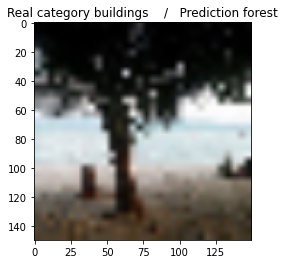

In [318]:
indx = np.random.choice(df_results[df_results['Category'] != df_results['Predictions']].index)
print(indx)
real_cat = test_folders[df_results.loc[indx,'Category']]
pred_cat = test_folders[df_results.loc[indx,'Predictions']]
plt.imshow(cv2.resize(images_test[indx], dsize= (150,150)))
plt.title(f'Real category {real_cat}    /   Prediction {pred_cat}')